# Fitting a Ridge Regression Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
import numpy as np

sns.set_style("whitegrid")

In [2]:
data = pd.read_excel("./data/dataRidge.xlsx", sheet_name='data')
X_train = pd.read_excel("./data/dataRidge.xlsx", sheet_name='XTrain')
X_test = pd.read_excel("./data/dataRidge.xlsx", sheet_name='XTest')
y_train = pd.read_excel("./data/dataRidge.xlsx", sheet_name='yTrain')
y_test = pd.read_excel("./data/dataRidge.xlsx", sheet_name='yTest')
data.head()

,X1,X2,Y
0,0.0208,19.5891,1.8531
1,0.0815,20.5700,2.6608
2,0.4559,19.5046,2.4986
3,0.3005,19.1038,1.6348
4,0.0502,19.2186,3.1839


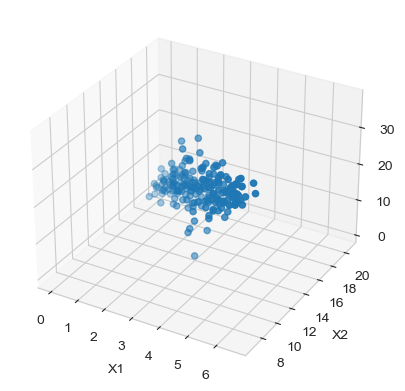

In [3]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data.X1, data.X2, data.Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

We can fit several [Ridge()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn-linear-model-ridge) classifiers with different values of alpha to see how this parameter affects the results.

In [4]:
alphas = range(0, 101)
coefs = []
intercepts = []
for a in alphas:
    regressor = Ridge(alpha=a)
    regressor.fit(X_train, y_train)
    coefs.append(regressor.coef_)
    intercepts.append(regressor.intercept_)

We can get the vectors of coefficients for the corresponding value of alpha.

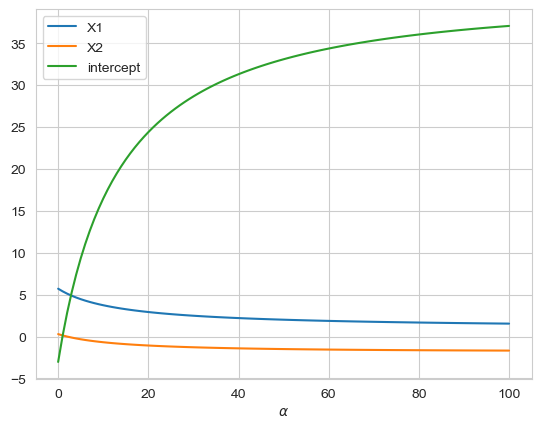

In [5]:
plt.figure()
plt.plot(alphas, np.concatenate(coefs))
plt.plot(alphas, intercepts)
plt.legend(["X1", "X2", "intercept"])
plt.xlabel("$\\alpha$")
plt.show()

We can see that the coefficient of X2 is positive when $\alpha$ is zero, and becomes negative as $\alpha$ increases.
We can calculate the predicted response for each $\alpha$ by multiplying the predictor matrix and the coefficient matrix, then adding the intercept to the result.

In [6]:
y_pred = np.array(intercepts).T + X_test.dot(np.concatenate(coefs).T)

We can calculate the mean squared error by subtracting the actual and predicted responses, squaring each value, and taking the mean.

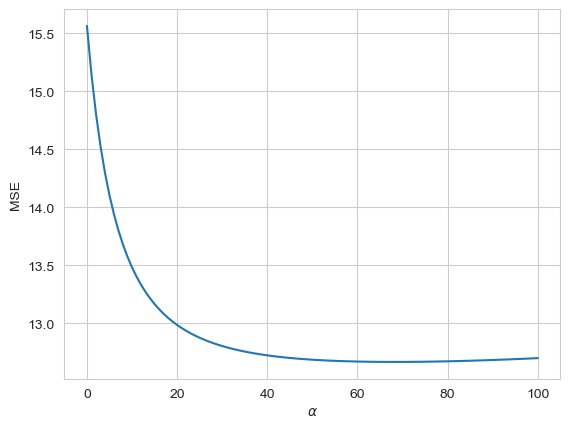

In [7]:
error = y_pred - y_test.Y.to_numpy().reshape(-1, 1)
MSE = np.mean(error**2, axis=0)

plt.figure()
plt.plot(MSE)
plt.xlabel("$\\alpha$")
plt.ylabel("MSE")
plt.show()

Find smallest MSE.

In [8]:
idx = MSE.argmin()
print(f"Minimum MSE:\n MSE = {MSE[idx]} at alpha = {idx}")

Minimum MSE:
 MSE = 12.667591785621735 at alpha = 68
